In [114]:
POWER_CAPACITY = 10 # MW

LOAD_FACTOR = 0.9 

AREA_COAL_BED = 12 #km^2

POWER_PER_YEAR = POWER_CAPACITY * LOAD_FACTOR * 365 * 24  

In [115]:
f"Power per year is {POWER_PER_YEAR / 1000} GWh" 

'Power per year is 78.84 GWh'

In [116]:

import pandas as pd
4

df = pd.read_excel('data.xlsx')


df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,Table: Production figures the Peel,NaN,NaN,NaN,NaN
1,NaN,(Annual flows in Nm3/km2),NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,Injection,Production,NaN,NaN
4,Year,CO2 (Nm3/km2),CH4(Nm3/km2),CO2(Nm3/km2),Water(m3/km2)


In [117]:
# Shift headers
df = pd.read_excel('data.xlsx', header=5)
df.head()


,Year,CO2 (Nm3/km2),CH4(Nm3/km2),CO2(Nm3/km2),Water(m3/km2)
0,1,1.698890e+06,1.031332e+06,0.000000,2111.376773
1,2,1.699535e+06,2.933781e+05,0.000000,2290.318334
2,3,1.699650e+06,1.440867e+05,0.000000,2076.812622
3,4,1.699642e+06,3.620504e+05,0.000000,2258.208925
4,5,1.699647e+06,1.278919e+06,0.000002,1905.327612


In [118]:
# disambiguate headers

df["CO2 injected (Nm3/km2)"] = df["CO2 (Nm3/km2)"]
df["CO2 produced (Nm3/km2)"] = df["CO2(Nm3/km2)"]

df = df[["Year", "CO2 injected (Nm3/km2)", "CO2 produced (Nm3/km2)", "CH4(Nm3/km2)", "Water(m3/km2)"]]
df.head()

,Year,CO2 injected (Nm3/km2),CO2 produced (Nm3/km2),CH4(Nm3/km2),Water(m3/km2)
0,1,1.698890e+06,0.000000,1.031332e+06,2111.376773
1,2,1.699535e+06,0.000000,2.933781e+05,2290.318334
2,3,1.699650e+06,0.000000,1.440867e+05,2076.812622
3,4,1.699642e+06,0.000000,3.620504e+05,2258.208925
4,5,1.699647e+06,0.000002,1.278919e+06,1905.327612


In [119]:
# Multiply by AREA:

df["CO2 injected (Nm3)"] = df["CO2 injected (Nm3/km2)"]  * AREA_COAL_BED
df["CO2 produced (Nm3)"] = df["CO2 produced (Nm3/km2)"] * AREA_COAL_BED
df["CH4 produced (Nm3)"] = df["CH4(Nm3/km2)"]  * AREA_COAL_BED
df["Water produced (Nm3)"] = df["Water(m3/km2)"] * AREA_COAL_BED

# Drop 
df = df[["Year", "CO2 injected (Nm3)", "CO2 produced (Nm3)", "CH4 produced (Nm3)", "Water produced (Nm3)"]]

df.head()

,Year,CO2 injected (Nm3),CO2 produced (Nm3),CH4 produced (Nm3),Water produced (Nm3)
0,1,2.038669e+07,0.000000,1.237598e+07,25336.521282
1,2,2.039442e+07,0.000000,3.520537e+06,27483.820013
2,3,2.039580e+07,0.000000,1.729040e+06,24921.751463
3,4,2.039571e+07,0.000000,4.344605e+06,27098.507098
4,5,2.039576e+07,0.000027,1.534703e+07,22863.931350


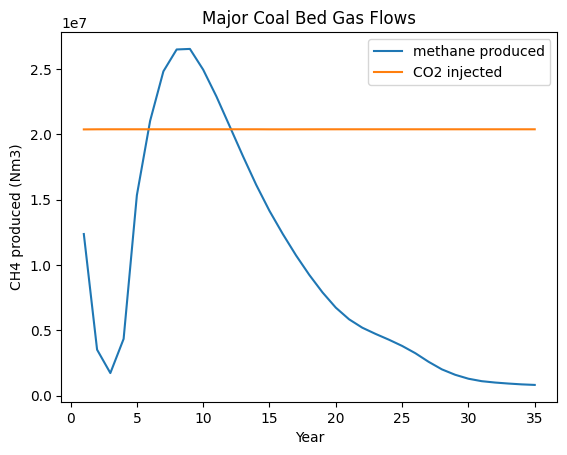

In [123]:
import matplotlib.pyplot as plt

fig, ax =plt.subplots()

ax.plot(df["Year"], df["CH4 produced (Nm3)"], label="methane produced")
ax.plot(df["Year"], df["CO2 injected (Nm3)"], label="CO2 injected")

ax.set_title("Major Coal Bed Gas Flows")

ax.set_xlabel("Year")
ax.set_ylabel("CH4 produced (Nm3)")

ax.legend()

KeyError: 'Water(m3)'

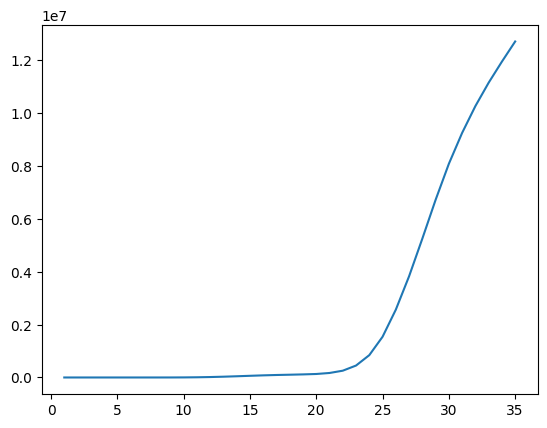

In [ ]:
import matplotlib.pyplot as plt

fig, ax =plt.subplots()

ax.plot(df["Year"], df["CO2 produced (Nm3)"], label="CO2 produced")
ax.plot(df["Year"], df["Water"].  label="H2O produced")

ax.set_title("Minor Coal Bed Gas Flows")

ax.set_xlabel("Year")
ax.set_ylabel("Normal Volume per square kilometer (Nm3)")

ax.legend()

In [ ]:
# Percentage of CO2 in the output stream